# CE9010 Introduction to Data Science Project
# NBA Analysis

## Data Acquisition
 ------
#### Warning, long runtime of up to 40 minutes. Program will finish scraping when END OF YEAR: 2016 is printed.

Scraper written using beautifulsoup.





### Data Collection
---
Our main goal is to predict the performance of college prospects in their first and second year of NBA based on their college game performance. Hence we chose to use their advanced statistics available from their college play (ws, ws/40min) and their advanced statistics available in the NBA (PER, BPM, VORP) for their first two years in the league. 

We chose to extract data from 1996 as college advanced statistics were only available from the 1995 season onwards. We also chose to only include the first 30 draft picks of each draft as players beyond the 30th picks usually do not play significant minutes in their teams.

Player's NBA stats extracted from [Basketball Reference](https://www.basketball-reference.com/).

Player's College stats extracted from [Sports Reference](https://www.sports-reference.com/)





#### Legend
---



## Data Scraper


First, we import the relevant libraries.

In [37]:
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')
import matplotlib.pyplot as plt

# machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 3d visualization
from mpl_toolkits.mplot3d import axes3d

## Initialise datasets
Create numpy arrays to store datasets

In [76]:
comb = pd.read_csv('merged_data.csv', header=None,index_col=0)
comb.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,,,,,,,,,,,,,,
0,18.0,20.4,4.1,9.0,0.065,0.138,1.5,3.8,2.7,4.6,8.6,0.283,9.83,1996
1,17.8,15.9,3.7,0.9,0.095,0.022,-0.3,-0.7,0.8,0.7,8.1,0.320,8.92,1996
2,17.4,21.1,2.9,6.9,0.049,0.113,-2.0,1.2,0.0,2.3,5.4,0.221,6.44,1996
3,16.1,16.3,3.7,5.3,0.077,0.082,-1.0,-0.6,0.6,1.1,4.3,0.127,12.71,1996
4,14.6,16.2,4.9,7.0,0.092,0.102,0.3,1.8,1.5,3.2,8.3,0.303,8.19,1996


In [44]:
data = np.loadtxt('merged_data.csv', delimiter=',')
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
n = data.shape[0] 
print("Number of training data:", n)

print(data[:5,:])
print(data.shape) #size of matrix

Number of training data: 440
[[0.00 18.00 20.40 4.10 9.00 0.07 0.14 1.50 3.80 2.70 4.60 8.60 0.28 9.83
  1996.00]
 [1.00 17.80 15.90 3.70 0.90 0.10 0.02 -0.30 -0.70 0.80 0.70 8.10 0.32
  8.92 1996.00]
 [2.00 17.40 21.10 2.90 6.90 0.05 0.11 -2.00 1.20 0.00 2.30 5.40 0.22
  6.44 1996.00]
 [3.00 16.10 16.30 3.70 5.30 0.08 0.08 -1.00 -0.60 0.60 1.10 4.30 0.13
  12.71 1996.00]
 [4.00 14.60 16.20 4.90 7.00 0.09 0.10 0.30 1.80 1.50 3.20 8.30 0.30 8.19
  1996.00]]
(440, 15)


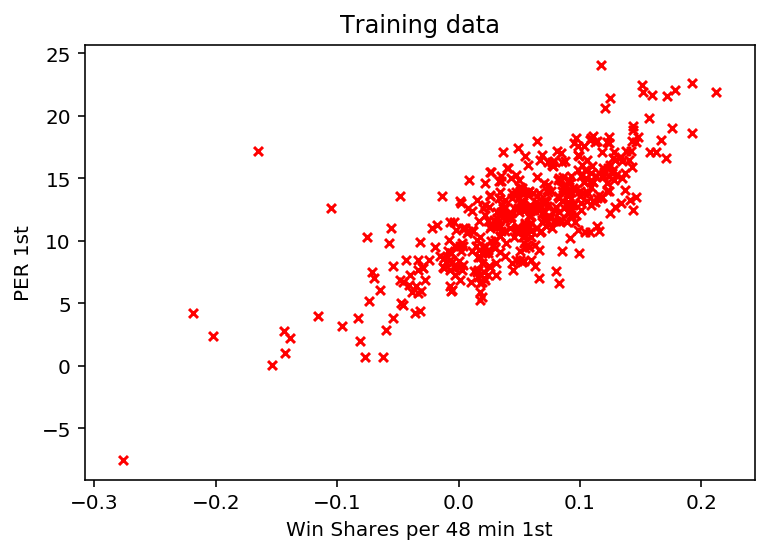

In [49]:
x_train = data[:,5]
y_train = data[:,1]

#plot library
plt.figure(1)
#YOUR CODE HERE
plt.scatter(x_train, y_train, s=20, c='r', marker='x', linewidths=1)
#s=dot size,c=colour
plt.title('Training data')
plt.xlabel('Win Shares per 48 min 1st')
plt.ylabel('PER 1st')
plt.show()

In [50]:
# construct data matrix
X = np.ones([n,2]) 
X[:,1] = x_train
print(X.shape)
print(X[:5,:],"\n")

w = np.array([0.2,-1.4])[:,None] # [:,None] adds a singleton dimension
print(np.array([[0.2,-1.4]]).shape)
print(w.shape)
print(w,"\n")

# predictive function definition
def f_pred(X,w):
    f = X.dot(w)
    return f

# Test predicitive function 
y_pred = f_pred(X,w)
print(y_pred[:5])

(440, 2)
[[1.00 0.07]
 [1.00 0.10]
 [1.00 0.05]
 [1.00 0.08]
 [1.00 0.09]] 

(1, 2)
(2, 1)
[[0.20]
 [-1.40]] 

[[0.11]
 [0.07]
 [0.13]
 [0.09]
 [0.07]]


In [51]:
# loss function definition
def loss_mse(y_pred,y): 
    n = len(y)
    #YOUR CODE HERE
    loss = (1/n)*(y_pred-y).T.dot(y_pred-y)
    return loss


# Test loss function 
y = y_train[:,None] # label 
#print(y.shape)
y_pred = f_pred(X,w) # prediction
loss = loss_mse(y_pred,y)
print(loss)

[[159.38]]


In [52]:
# gradient function definition
def grad_loss(y_pred,y,X):
    n = len(y)
    grad = (2/n)*X.T.dot(y_pred-y)
    return grad


# Test grad function 
y_pred = f_pred(X,w)
grad = grad_loss(y_pred,y,X)
print(grad)    

[[-23.89]
 [-1.66]]


In [77]:
lin_reg_sklearn = LinearRegression(normalize = True) #normalize

# comb['College Win Shares per 40 min'] = preprocessing.scale(comb['College Win Shares per 40 min'])

plt.scatter(comb['College Win Shares per 40 min'], comb['Win Shares 2nd'],s=10, c='r', marker='o', linewidths=1)

lin_reg_sklearn.fit(comb['College Win Shares per 40 min'].reshape([-1,1]), comb['Win Shares 2nd'].reshape([-1,1]))
print('testtest ' + str(lin_reg_sklearn.predict(5)))
plt.plot(range(-5,6), np.asarray([lin_reg_sklearn.predict(x) for x in range(-5,6)]).reshape(-1 ,1))
plt.show()

KeyError: 'College Win Shares per 40 min'

[[9.50]
 [49.40]]
loss sklearn= [[6.21]]
loss gradient descent= 82.61346565598072


ValueError: x and y must have same first dimension, but have shapes (11,) and (100,)

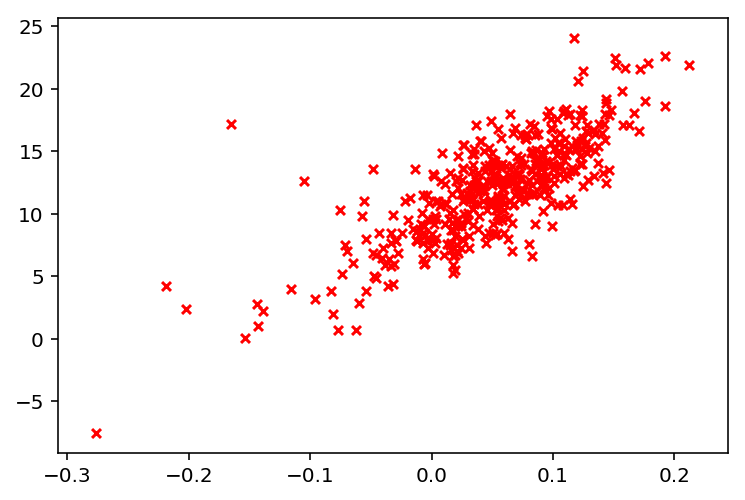

In [78]:
lin_reg_sklearn = LinearRegression()
lin_reg_sklearn.fit(x_train[:,None], y_train)# learn the model parameters 

w_sklearn = np.zeros([2,1])
w_sklearn[0,0] = lin_reg_sklearn.intercept_
w_sklearn[1,0] = lin_reg_sklearn.coef_
print(w_sklearn)

loss_sklearn = loss_mse(f_pred(X,w_sklearn),y_train[:,None])
print('loss sklearn=',loss_sklearn)
print('loss gradient descent=',L_iters[-1]) 

y_pred_sklearn = w_sklearn[0] + w_sklearn[1]* x_pred

plt.figure(1)
plt.scatter(x_train, y_train, s=20, c='r', marker='x', linewidths=1)
plt.plot( x_pred, y_pred_sklearn,label='Scikit-learn optimization', range(-5,6))
plt.title('Training data')
plt.xlabel('Win Shares per 48 min 1st')
plt.ylabel('PER 1st')
plt.show()

In [60]:
print('Profit would be', np.array([[1,4.5]]).dot(w_sklearn)[0,0]*10000)

Profit would be 2317986.327753191


## Removing features with low variance

In [84]:
from sklearn.feature_selection import VarianceThreshold
X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

## SKLearn

In [47]:
college_df = pd.read_csv('college_all.csv')
college_df.isnull().sum() #check for missing data
college_df.columns = ["Player","sos", "year","mp", "ts_pct","efg_pct","3pt_ar", "fta_per_fga","ws_per_40",
                      'g','gs','fg_per_min','fga_per_min','fg_pct','fg2_per_min','fg2a_per_min','fg2_pct','fg3_per_min',
                      'fg3a_per_min','fg3_pct','ft_per_min','fta_per_min','ft_pct','trb_per_min','ast_per_min',
                      'stl_per_min','blk_per_min', 'tov_per_min','pf_per_min','pts_per_min']
college_df = college_df.drop(columns = ['gs']) #remove column with many empty cells

nba_df = pd.read_csv('nba_all.csv', header=None)
nba_df.columns = ['Player','PER 1st', 'PER 2nd', 'WS48 1st','WS48 2nd',
                  'BPM 1st', 'BPM 2nd','VORP 1st', 'VORP 2nd', 'year']

nba_df = nba_df.drop(['year'], axis=1) #remove duplicate column



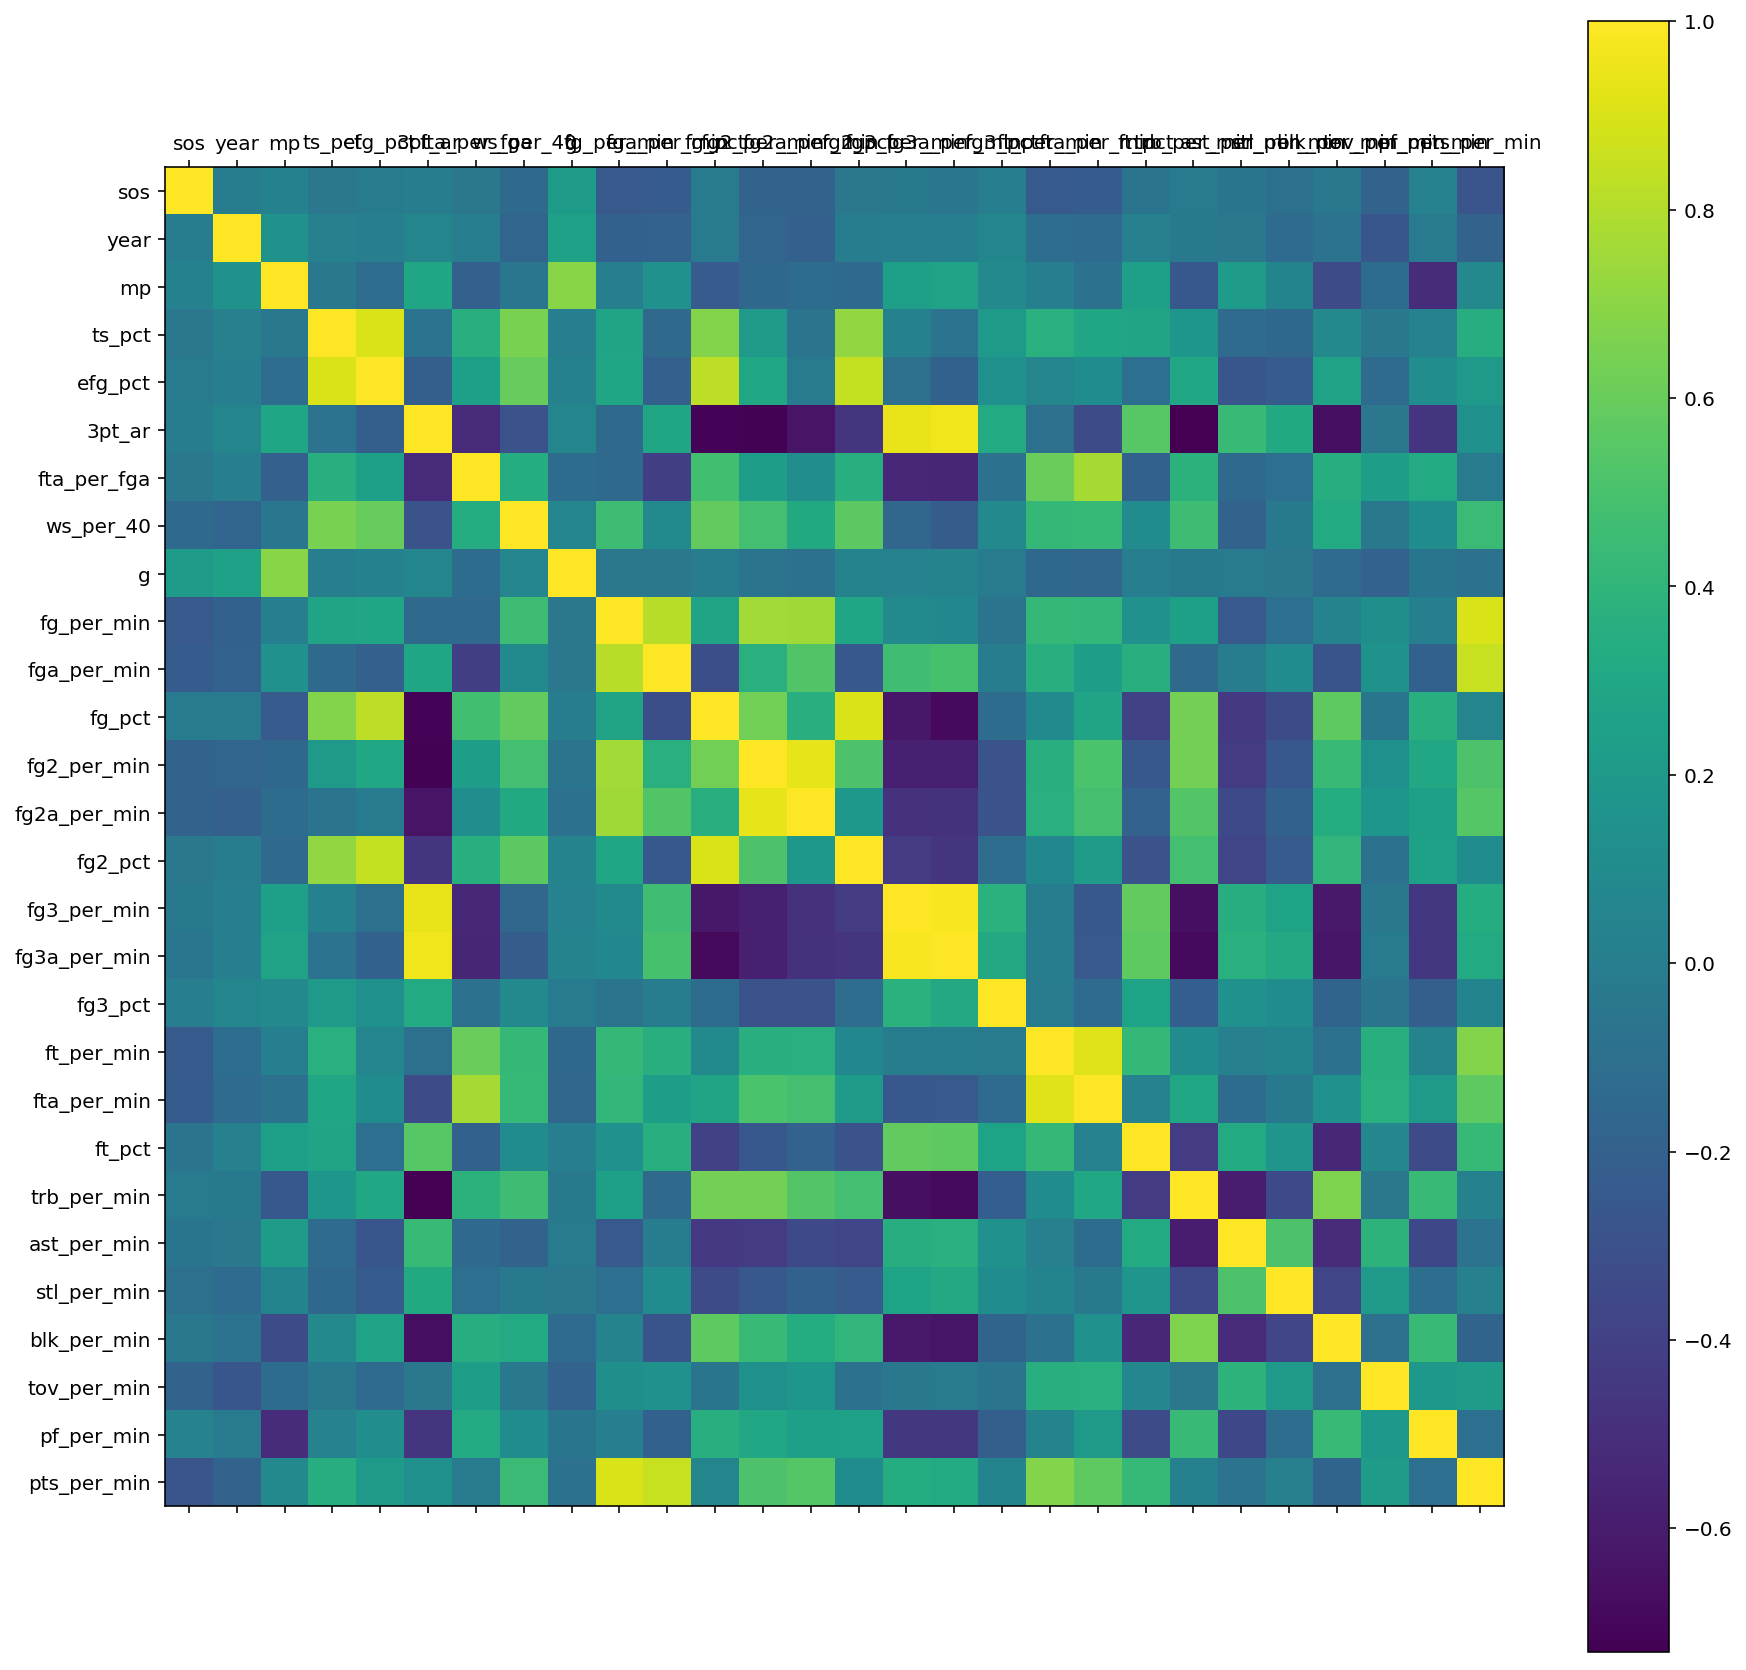

In [48]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
plot_corr(college_df, 15)
#drop all high correlations and negative

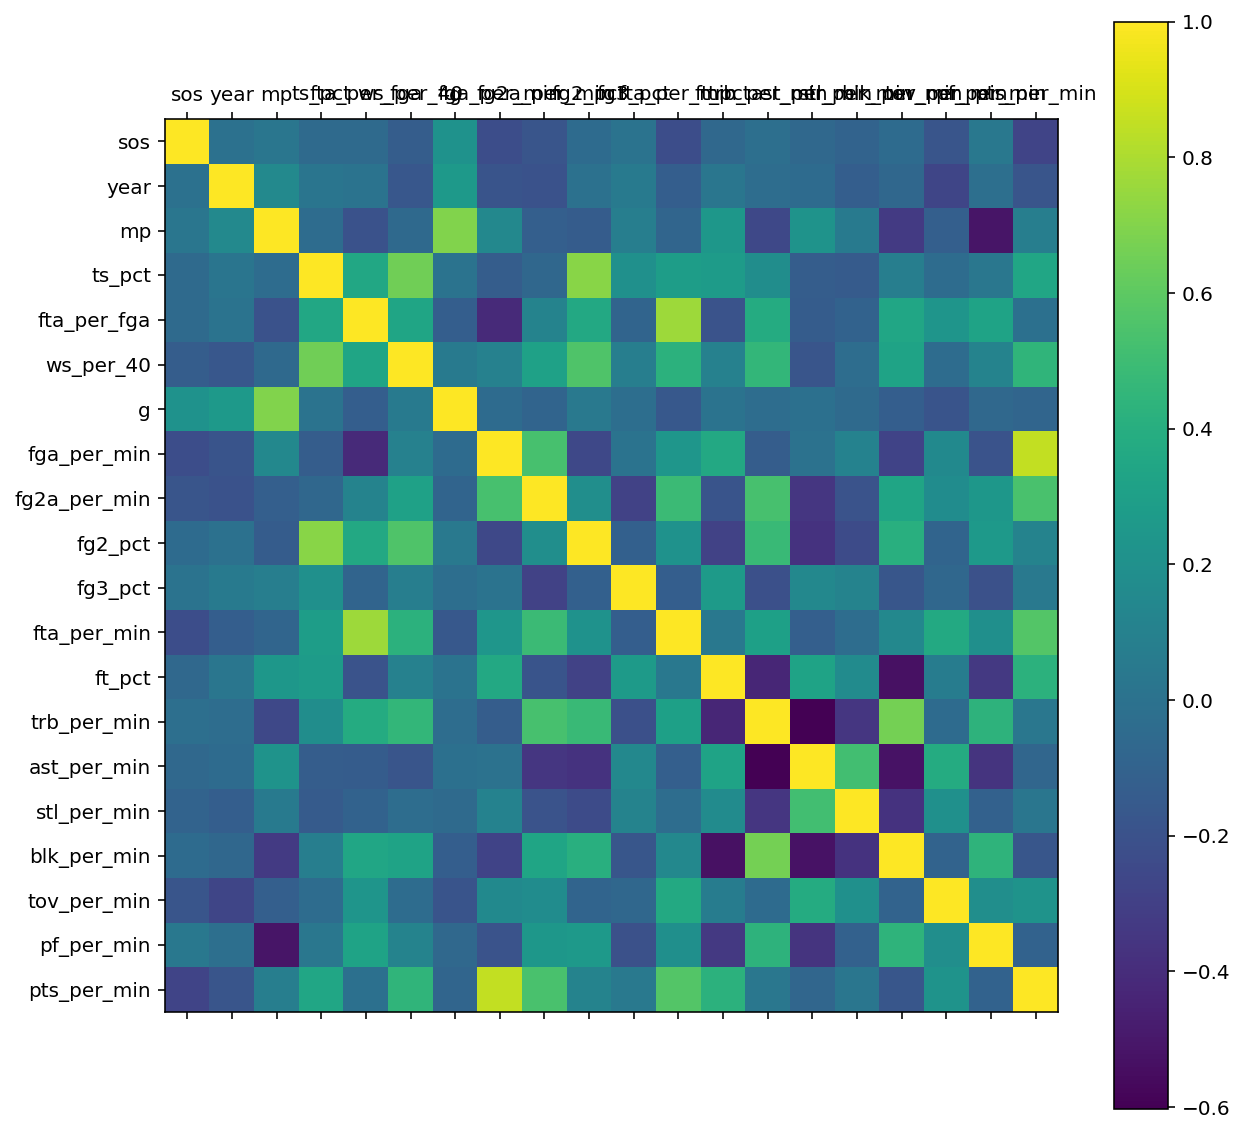

In [49]:
#after removing high correlations
college_df = college_df.drop(columns = ['3pt_ar','efg_pct','fg3_per_min','fg3a_per_min','ft_per_min',
                                         'fg2_per_min','fg_per_min','fg_pct'])
plot_corr(college_df, 10)

In [50]:
comb = pd.merge(nba_df, college_df, on=['Player', 'Player'])

print(comb.shape)
print("Number of rows to remove =",college_df[college_df.isnull().any(axis=1)].shape[0]) #amount of data to remove
comb = comb.dropna(how = 'any').drop(columns = ['Player']) #remove rows with NaN
print(comb.shape)
print("Are there any rows with empty cells?", comb.isnull().values.any() )
comb.head()

(485, 29)
Number of rows to remove = 85
(400, 28)
Are there any rows with empty cells? False


,PER 1st,PER 2nd,WS48 1st,WS48 2nd,BPM 1st,BPM 2nd,VORP 1st,VORP 2nd,sos,year,...,fg3_pct,fta_per_min,ft_pct,trb_per_min,ast_per_min,stl_per_min,blk_per_min,tov_per_min,pf_per_min,pts_per_min
0,17.8,15.9,0.095,0.022,-0.3,-0.7,0.8,0.7,8.92,1996,...,0.000,9.2,0.700,10.7,2.3,1.3,5.1,3.3,3.4,26.7
1,17.4,21.1,0.049,0.113,-2.0,1.2,0.0,2.3,6.44,1996,...,0.381,10.2,0.683,9.7,1.2,2.1,1.4,3.6,2.4,24.3
2,16.1,16.3,0.077,0.082,-1.0,-0.6,0.6,1.1,12.71,1996,...,0.370,4.9,0.738,3.4,4.8,1.9,0.1,3.4,2.4,20.2
3,14.6,16.2,0.092,0.102,0.3,1.8,1.5,3.2,8.19,1996,...,0.466,5.4,0.810,8.3,4.3,2.2,0.7,3.0,1.7,29.8
4,15.5,17.8,0.027,0.070,-1.0,0.7,0.8,2.2,10.06,1996,...,0.188,5.4,0.631,12.4,4.3,2.5,1.0,3.7,3.5,22.5


### Import SKLearn

In [107]:
#enter favourite number
seed = 100
  
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

comb.head()

,PER 1st,PER 2nd,WS48 1st,WS48 2nd,BPM 1st,BPM 2nd,VORP 1st,VORP 2nd,sos,year,...,fg3_pct,fta_per_min,ft_pct,trb_per_min,ast_per_min,stl_per_min,blk_per_min,tov_per_min,pf_per_min,pts_per_min
0,17.8,15.9,0.095,0.022,-0.3,-0.7,0.8,0.7,8.92,1996,...,0.000,9.2,0.700,10.7,2.3,1.3,5.1,3.3,3.4,26.7
1,17.4,21.1,0.049,0.113,-2.0,1.2,0.0,2.3,6.44,1996,...,0.381,10.2,0.683,9.7,1.2,2.1,1.4,3.6,2.4,24.3
2,16.1,16.3,0.077,0.082,-1.0,-0.6,0.6,1.1,12.71,1996,...,0.370,4.9,0.738,3.4,4.8,1.9,0.1,3.4,2.4,20.2
3,14.6,16.2,0.092,0.102,0.3,1.8,1.5,3.2,8.19,1996,...,0.466,5.4,0.810,8.3,4.3,2.2,0.7,3.0,1.7,29.8
4,15.5,17.8,0.027,0.070,-1.0,0.7,0.8,2.2,10.06,1996,...,0.188,5.4,0.631,12.4,4.3,2.5,1.0,3.7,3.5,22.5


In [108]:
lin_reg_sklearn = LinearRegression(normalize = True) #normalize according to z

def merge_train(i, xset, yset):
    to_merge_x = [val for index, val in enumerate(xset) if index != i]
    to_merge_y = [val for index, val in enumerate(yset) if index != i]
    return pd.concat(to_merge_x), pd.concat(to_merge_y)

no_of_sets = 4
kf = KFold(n_splits=no_of_sets)
X = comb.iloc[:, 8:]
kf.get_n_splits(X)
print(kf)

def split_val_set(y_var, kf):
    '''
    SPLITS TRAIN SET INTO VAL AND TRAINING SETS
    '''
    X_np = X.values
    for train_index, test_index in kf.split(X_np):
        X_train = [X_np[i] for i in train_index]
        X_test = [X_np[i] for i in test_index]
#         X_train, X_test = X[train_index], X[test_index]
        y_train = [comb[y_var].values[i] for i in train_index]
        y_test = [comb[y_var].values[i] for i in test_index]
#         y_train, y_test = comb[y_var][train_index], comb[y_var][test_index]
    return X_train, y_train, X_test, y_test

for y_name in list(nba_df.iloc[:,1:]):
    print(y_name)
#     print(y_train)
#     print(X_train.shape,y_train.shape)
    X_train , y_train, x_valid, y_valid = split_val_set(y_name, kf)
    # comb['College Win Shares per 40 min'] = preprocessing.scale(comb['College Win Shares per 40 min']
    

    min_mse = float('inf')
    
    for i in range(no_of_sets):
#         x_valid = X_test
#         y_valid = y_test
#         x_train, y_train = merge_train(i, xset, yset)
        
        lin_reg_sklearn.fit(X_train, y_train)
#         print(X_train.shape, y_train.shape)
        mse = mean_squared_error(y_valid, lin_reg_sklearn.predict(X_valid))
        if min_mse > mse:
            min_mse = mse
            best_model = lin_reg_sklearn

    #         mean_squared_error(y_true, y_pred, sample_weight=None, multioutput=
#         w_sklearn = np.zeros([2,1])
#         w_sklearn[0,0] = lin_reg_sklearn.intercept_
#         w_sklearn[1,0] = lin_reg_sklearn.coef_
#         print(w_sklearn)
    #         plt.scatter(comb['College Win Shares per 40 min'], comb['Win Shares 2nd'],s=20, c='r', marker='o', linewidths=1)
            # plt.plot(range(-5,6), np.asarray([lin_reg_sklearn.predict(x) for x in range(-5,6)]).reshape(-1 ,1))
            # y_pred_sklearn = w_sklearn[0] + w_sklearn[1]* 
#         plt.plot()
            # plt.plot(comb['College Win Shares per 40 min'], np.asarray([lin_reg_sklearn.predict(x) for x in comb['College Win Shares per 40 min']]).reshape(-1 ,1))

#         plt.show()
    print(min_mse)
    print(best_model.score(X_valid, y_valid))

KFold(n_splits=4, random_state=None, shuffle=False)
PER 1st
19.391887290940225
-0.09718992766438173
PER 2nd
22.775207399034112
-0.135269925801333
WS48 1st
0.0036819751431761815
-0.029050827286481784
WS48 2nd
0.003975152390204885
-0.1590624317669731
BPM 1st
8.783471681487114
-0.007139803344482498
BPM 2nd
11.19970503786928
-0.1320087375050516
VORP 1st
0.5587748717340696
-0.6024929571857882
VORP 2nd
1.2436284488115938
-0.43473517398661077


In [122]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import minimize
X = np.array(comb.iloc[:, 8:])
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)
print(X.shape)
n = X.shape[0] 
print(n)

(400, 20)
400


In [114]:
X = np.ones([n,21]) 
X[:,1:] = np.array(comb.iloc[:, 8:])
print(X.shape)

y = np.array(comb.iloc[:,1])[:,None] # label 

(400, 21)


In [115]:
# parameters vector

# predictive function definition
def f_pred(X,w): 
    f = X.dot(w) 
    return f

In [116]:
# loss function definition
def loss_mse(y_pred,y): 
    n = len(y)
    loss = 1/40* (y_pred - y).T.dot(y_pred - y) 
    return loss

# gradient function definition
def grad_loss(y_pred,y,X):
    n = len(y)
    grad = 2/n* X.T.dot(y_pred-y) 
    return grad

def grad_desc(X, y , w_init ,tau=0.01, max_iter=500):

    L_iters = np.zeros([max_iter]) # record the loss values
    w_iters = np.zeros([max_iter,2]) # record the loss values
    w = w_init # initialization
    for i in range(max_iter): # loop over the iterations
        y_pred = f_pred(X,w) # linear predicition function #YOUR CODE HERE
        grad_f = grad_loss(y_pred,y,X) # gradient of the loss #YOUR CODE HERE
        w = w - tau* grad_f # update rule of gradient descent #YOUR CODE HERE
        L_iters[i] = loss_mse(y_pred,y) # save the current loss value 
        w_iters[i,:] = w[0],w[1] # save the current w value
    L_iters = L_iters[~np.isnan(L_iters)]
    L_iters = L_iters[L_iters<4.75431352e+296]
    print(L_iters)
        
    return w, L_iters, w_iters

# run gradient descent algorithm 
w_init = np.ones(21)[:,None]
tau = 0.1
max_iter = 200
w, L_iters, w_iters = grad_desc(X,y,w_init,tau,max_iter)
print(w,"\n",L_iters[-1])

[1.01126381e+008 1.07821501e+020 1.15006397e+032 1.22670074e+044
 1.30844435e+056 1.39563510e+068 1.48863598e+080 1.58783416e+092
 1.69364260e+104 1.80650179e+116 1.92688157e+128 2.05528310e+140
 2.19224092e+152 2.33832519e+164 2.49414407e+176 2.66034625e+188
 2.83762363e+200 3.02671424e+212 3.22840528e+224 3.44353639e+236
 3.67300319e+248 3.91776095e+260 4.17882863e+272 4.45729306e+284
 4.75431352e+296]
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]] 
 4.754313517775657e+296


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in subtract


In [117]:
from sklearn.linear_model import Ridge
import numpy as np
y = comb.iloc[:, :8]
clf = Ridge(alpha=1.0)
clf.fit(X, y) 

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [124]:
# predictive function definition
def f_pred(X,w): 
    f = X.dot(w) 
    return f

def loss_reg(w,X,y,reg): 
    n = len(y)
    y_pred = (X.dot(w)) 
    loss = -1/n* ( y.T.dot(np.log(y_pred+1e-10)) + (1-y).T.dot(np.log(1-y_pred+1e-10)) ) 
    d = w.shape[0]
    loss += reg/d * w.T.dot(w)
    return loss

def compute_w_solution(X,y,reg):
    initial_w = np.zeros((X.shape[1],1))
    result = minimize(loss_reg, initial_w, args=(X,y,reg), method='Powell', options={'maxiter':500})
    w_solution = np.array(result.x)[:,None]
    loss_solution = loss_reg(w_solution,X,y,reg)
    return w_solution, loss_solution

def compute_error(X,w,y):
    
    # continuous predictive function of the classes
    pred = f_pred(X,w)
    
    # discrete predictive function of the classes
    y_pred = (pred >= 0.5).astype('int').squeeze()

    # accuracy
    y = y.squeeze()
    diff = (y_pred == y).astype('int')
    accuracy = 100* sum(diff)/ y.shape[0]
    
    return 100-accuracy

In [125]:
# List of values of the regularization parameter λ
reg = np.array(range(-6,4),np.float32)
reg = 10**reg
list_reg = list(reg)

d = 3
poly = PolynomialFeatures(d)

train_y = np.array(y.iloc[:,1])[:,None] 
val_y = np.array(y.iloc[:,1])[:,None]

train_error_tab = np.zeros(len(list_reg))
val_error_tab = np.zeros(len(list_reg))

for i,reg in enumerate(list_reg):
    
    train_X = poly.fit_transform(X[:,0:2]) #YOUR CODE HERE
    train_w_solution, train_loss_solution = compute_w_solution(train_X,train_y,reg)#YOUR CODE HERE
    train_error = compute_error(train_X,train_w_solution,train_y)#YOUR CODE HERE
    train_error_tab[i] = train_error
    
    val_X = poly.fit_transform(val_data[:,0:2])#YOUR CODE HERE
    val_error = compute_error(val_X,train_w_solution,val_y)#YOUR CODE HERE
    val_error_tab[i] = val_error

    
# plot
x = np.log(list_reg)
plt.figure(1)
plt.plot(x, train_error_tab,label='Train error'.format(i=1))
plt.plot(x, val_error_tab,label='Val error'.format(i=2))
plt.legend(loc='best')
plt.title('Error w.r.t. regularization')
plt.xlabel('Regularization parameter')
plt.ylabel('Error')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


NameError: name 'val_data' is not defined